#Q1: Is there any pattern for gross and how many pictures directed by person?

In [10]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("movies_database.sqlite")
cur = conn.cursor()

#cur.execute("""select name from sqlite_master where type = 'table'""")
df = pd.read_sql(f"select count(*) from imdb_title_principals where category='director' or job='director'", conn)
#display(df)
df1 = pd.read_sql(f"select count(*) from imdb_title_principals ", conn)
#display(df)

print(df1, df, df1-df)
#imdb_title_crew



   count(*)
0   1028186    count(*)
0    146398    count(*)
0    881788


In [30]:
query = f"select * from  imdb_name_basics  order by nconst"
df = pd.read_sql(query, conn)
display(df)



,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
1,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
2,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0050976"
3,nm0000006,Ingrid Bergman,1915.0,1982.0,"actress,soundtrack,producer","tt0071877,tt0036855,tt0038109,tt0038787"
4,nm0000007,Humphrey Bogart,1899.0,1957.0,"actor,soundtrack,producer","tt0034583,tt0033870,tt0037382,tt0043265"
...,...,...,...,...,...,...
606643,nm9993494,Amjad Ali,NaN,NaN,writer,tt7722258
606644,nm9993573,Lakisha Louissaint,NaN,NaN,"director,writer,producer",tt10299418
606645,nm9993616,Ryan Mac Lennan,NaN,NaN,actor,tt4844148
606646,nm9993650,Marcin Balcerak,NaN,NaN,actor,tt8739208


In [33]:
query = f"select * from  imdb_title_crew where directors is not null order by directors"
df = pd.read_sql(query, conn)
display(df)

,tconst,directors,writers
0,tt0069049,nm0000080,"nm0000080,nm0462648"
1,tt3715320,nm0000095,nm0000095
2,tt1605783,nm0000095,nm0000095
3,tt2870756,nm0000095,nm0000095
4,tt4513674,nm0000095,nm0000095
...,...,...,...
140412,tt8742566,nm9992900,"nm9992900,nm9992899"
140413,tt8742574,nm9992905,None
140414,tt8742576,nm9992906,nm9992906
140415,tt8743182,"nm9993380,nm9993379,nm9993381","nm9993380,nm9993379"


In [67]:
query = f"select names.,g.domestic_gross, g.foreign_gross, g.year from  imdb_title_crew titles join imdb_name_basics names on names.nconst=titles.directors join imdb_title_basics b on titles.tconst=b.tconst join bom_movie_gross g on g.title=b.primary_title join tn_movie_budgets bg on bg.movie = b.primary_title where directors is not null and g.domestic_gross > 0 order by directors,year,domestic_gross,production_budget"
df = pd.read_sql(query, conn)
display(df)

,primary_name,title,studio,domestic_gross,foreign_gross,year
0,Woody Allen,You Will Meet a Tall Dark Stranger,SPC,3200000.0,31000000,2010
1,Woody Allen,Midnight in Paris,SPC,56800000.0,94300000,2011
2,Woody Allen,To Rome with Love,SPC,16700000.0,56600000,2012
3,Woody Allen,Blue Jasmine,SPC,33400000.0,64099999,2013
4,Luc Besson,Anna,VE,4300.0,None,2014
...,...,...,...,...,...,...
1420,Remi Ibinola,Unfinished Business,Fox,10200000.0,4200000,2015
1421,Simon Peace Maker,Paranoia,Rela.,7400000.0,6400000,2013
1422,Hani Sabri,Upside Down,MNE,105000.0,8000000,2013
1423,Max Coultan,Tag,WB (NL),54700000.0,23400000,2018


0        3200000.0
1       56800000.0
2       16700000.0
3       33400000.0
4           4300.0
           ...    
1420    10200000.0
1421     7400000.0
1422      105000.0
1423    54700000.0
1424    90400000.0
Name: domestic_gross, Length: 1425, dtype: float64


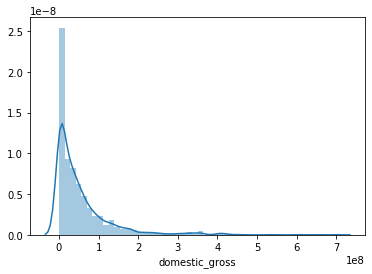

In [68]:
import seaborn as sns
data=df['domestic_gross']
#print(data)
#boxplot = sns.boxplot(data)
#boxplot.set(xlabel = "X Label", ylabel='Y Label', title='Example Boxplot')
sns.distplot(data);
print(data)

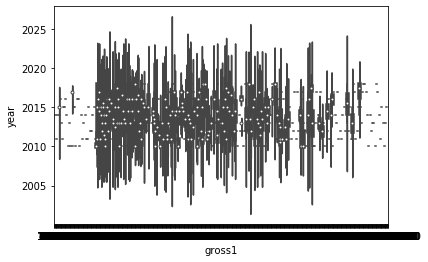

In [93]:
import numpy as np
query = f"select  g.domestic_gross as gross1,g.year,title from  imdb_title_crew titles join imdb_name_basics names on names.nconst=titles.directors join imdb_title_basics b on titles.tconst=b.tconst join bom_movie_gross g on g.title=b.primary_title join tn_movie_budgets bg on bg.movie = b.primary_title where directors is not null and g.domestic_gross > 0 and year>0"
df = pd.read_sql(query, conn)
#sns.pairplot(df, vars=df.columns[:-1], hue='year')
#iris = sns.load_dataset(df.)
#sns.pairplot(iris);
#sns.pairplot(df)
#sns.catplot(x="gross1", y="year", kind="box", data=df);
#sns.show()
#print('jjjj')
#sns.catplot(x="gross1", y="year", aspect=.6, data=df)
sns.violinplot(x=df['gross1'], y=df['year'])

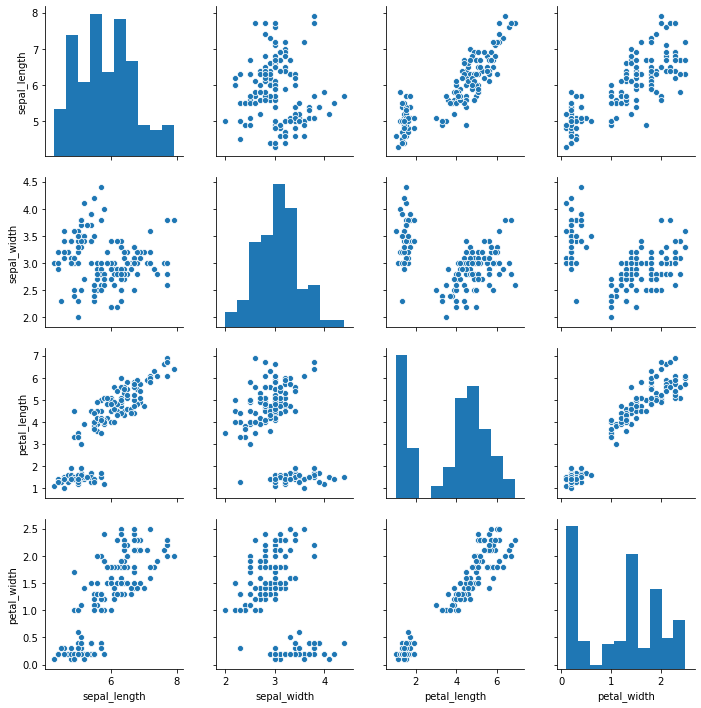

In [71]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);


In [40]:
query = f"select t2.primary_name,t1.tconst from imdb_title_crew t1 join imdb_name_basics t2 on nconst=directors join bom_movie_gross g on g.title=t1.primary_title order by primary_name"
df = pd.read_sql(query, conn)
display(df)


#query = f"select t2.primary_name,t3.title,production_budget,domestic_gross,worldwide_gross from imdb_title_crew t1 join imdb_name_basics t2 on nconst=directors join imdb_title_akas t3 on title_id=tconst join tn_movie_budgets t4 on t4.movie = t3.title"
#df = pd.read_sql(query, conn)
#display(df)


DatabaseError: Execution failed on sql 'select t2.primary_name,t1.tconst from imdb_title_crew t1 join imdb_name_basics t2 on nconst=directors join bom_movie_gross g on g.title=t1.primary_title order by primary_name': no such column: t1.primary_title

In [ ]:
query = f"select * from t"